# Export animation of fronts

In [45]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import pandas as pd
import matplotlib as mpl
from itertools import product
import matplotlib.colors as color
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
from matplotlib import cm
from cartopy.util import add_cyclic_point

In [2]:
#open the prepared dataset (1981/12/15-2019/2/15)
data = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/case_study_ssts.nc', decode_cf=True)

In [5]:
data.sst[counter,:,:]

<xarray.DataArray 'sst' (T: 2394, lat: 300, lon: 520)>
[373464000 values with dtype=float32]
Coordinates:
    zlev     float32 ...
  * lat      (lat) float32 -9.875 -9.625 -9.375 -9.125 ... 64.375 64.625 64.875
  * lon      (lon) float32 160.125 160.375 160.625 ... 289.375 289.625 289.875
  * T        (T) datetime64[ns] 1981-12-15T12:00:00 ... 2019-02-15
Attributes:
    valid_min:  -300
    valid_max:  4500
    long_name:  Daily sea surface temperature

In [5]:
file_path = "/glade/work/kdagon/FrontDetector/CESMOutputs/"

In [6]:
fronts_file = "cesm_fronts_2000-2005.nc"
onehot_file = "cesm_frontsOneHot_2000-2005.nc"
rates_file = "cesm_frontRates_2000-2005.nc"

In [59]:
pred_fronts = xr.open_dataset(file_path+fronts_file)

In [9]:
pfronts = pred_fronts.predicted_fronts
pfronts

<xarray.DataArray 'predicted_fronts' (time: 17520, front: 5, lat: 68, lon: 141)>
[839908800 values with dtype=float32]
Coordinates:
  * time        (time) object 2000-01-01 03:00:00 ... 2006-01-01 00:00:00
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
  * lon         (lon) float64 189.0 190.0 191.0 192.0 ... 327.0 328.0 329.0
    front_type  (front) object ...
Dimensions without coordinates: front
Attributes:
    long_name:  Predicted frontal boundary probability
    valid_min:  0.0
    valid_max:  1.0
    units:      1

In [60]:
onehot = xr.open_dataset(file_path+onehot_file)

In [61]:
fronts = onehot.fronts
fronts

<xarray.DataArray 'fronts' (time: 17520, front: 5, lat: 68, lon: 141)>
[839908800 values with dtype=float32]
Coordinates:
  * time        (time) object 2000-01-01 03:00:00 ... 2006-01-01 00:00:00
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
  * lon         (lon) float64 189.0 190.0 191.0 192.0 ... 327.0 328.0 329.0
    front_type  (front) object ...
Dimensions without coordinates: front
Attributes:
    long_name:     one-hot predicted fronts
    grid_mapping:  crs
    valid_min:     0
    valid_max:     1

In [67]:
# selecting cold fronts; the first year
cold_fronts_2000 = fronts.sel(time=slice("2000-01-01", "2000-12-31"), front=0)
cold_fronts_2000

<xarray.DataArray 'fronts' (time: 2919, lat: 68, lon: 141)>
[27987372 values with dtype=float32]
Coordinates:
  * time        (time) object 2000-01-01 03:00:00 ... 2000-12-31 21:00:00
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
  * lon         (lon) float64 189.0 190.0 191.0 192.0 ... 327.0 328.0 329.0
    front_type  object ...
Attributes:
    long_name:     one-hot predicted fronts
    grid_mapping:  crs
    valid_min:     0
    valid_max:     1

In [103]:
cold_fronts_2000_jan = fronts.sel(time=slice("2000-01-01", "2000-01-31"), front=0)
cold_fronts_2000_jan

<xarray.DataArray 'fronts' (time: 247, lat: 68, lon: 141)>
[2368236 values with dtype=float32]
Coordinates:
  * time        (time) object 2000-01-01 03:00:00 ... 2000-01-31 21:00:00
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
  * lon         (lon) float64 189.0 190.0 191.0 192.0 ... 327.0 328.0 329.0
    front_type  object ...
Attributes:
    long_name:     one-hot predicted fronts
    grid_mapping:  crs
    valid_min:     0
    valid_max:     1

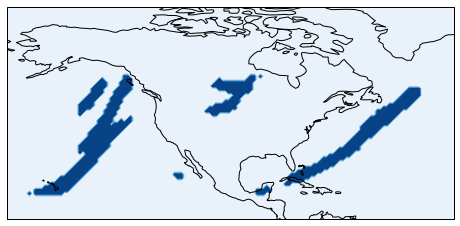

In [110]:
# test plot of first time index to customize
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

field, lon = add_cyclic_point(cold_fronts_2000_jan[0,:,:], coord=pfronts.lon)
lat = pfronts.lat

ax.contourf(lon, lat, field, cmap=cm.Blues, transform=ccrs.PlateCarree())
ax.coastlines();

# haven't gotten the datetime to work yet
#ax.set_title('Cold Fronts', fontsize=16)
#ax.text(0.9, 1.015,'Jan '+pd.to_datetime(data['T'].values[numerate]).strftime("%d"), 
            #fontsize=16,
            #transform=ax.transAxes)
        
#plt.savefig(f'../figures/cold_fronts_animation/pred_fronts_cold_2000_jan_0.png', bbox_inches='tight', dpi=200)

In [ ]:
#########################################################################################
#########################################################################################
#########################################################################################


for counter, ind in enumerate(np.arange(0,len(cold_fronts_2000_jan))):
    
    iterate = "{:02d}".format(counter)

    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(projection=ccrs.PlateCarree())
    
    field, lon = add_cyclic_point(cold_fronts_2000[ind,:,:], coord=pfronts.lon)
    lat = pfronts.lat

    ax.contourf(lon, lat, field, cmap=cm.Blues, transform=ccrs.PlateCarree())
    ax.coastlines();
    
    plt.savefig(f'../figures/cold_fronts_animation/pred_fronts_cold_2000_jan_{iterate}.png', bbox_inches='tight', dpi=200)
    #plt.show()
    plt.close()


#########################################################################################
#########################################################################################
#########################################################################################

In [112]:
import subprocess

def grid2gif(image_str, output_gif):
    str1 = 'convert -delay 8 -loop 0 ' + image_str  + ' ' + output_gif
    subprocess.call(str1, shell=True)

grid2gif("../figures/cold_fronts_animation/pred_fronts_cold_2000_jan_{00..246}.png", "../figures/cold_fronts_animation/fronts_cold_2000_jan.gif")